**BRAIN TUMOR DATA SEGMENTATION USING YOLO ALGORITHM**

In [ ]:
#installing ultralytics framework
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 68.8 MB/s eta 0:00:00


In [ ]:
mkdir "dataset" #Making dataset directory to store dataset imported from roboflow

In [ ]:
import os
os.chdir("/content/dataset") #Changing directory from root to dataset

In [ ]:
# Importing dataset from ROBOFLOW using API key
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="1YQLuPhVDI4qrISvG6Gi")
project = rf.workspace("iotseecs").project("brain-tumor-yzzav")
version = project.version(1)
dataset = version.download("yolov11")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 73.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 81.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to BRAIN-TUMOR-1 in yolov11:: 100%|██████████| 1680/1680 [00:00<00:00, 6156.09it/s]


In [ ]:
#IMPORTANT_STEP
# NOW OPEN THE "data.yaml" file located at "/content/datset/BRAIN_TUMOR-1/data.yaml" and give the paths of test,train and validation images
#Perform training after adjusting paths in data.yaml file

In [ ]:
#Training yolov11n-segmentation model on annotated data
from ultralytics import YOLO
model=YOLO('yolo11n-seg.pt')
model.train(
    data='/content/dataset/BRAIN-TUMOR-1/data.yaml',
    epochs=70,
    imgsz=640,
    optimizer='AdamW'
)

Ultralytics 8.3.231 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/BRAIN-TUMOR-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=70, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=100, perspective=0.0, p

ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b2899439ca0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041, 

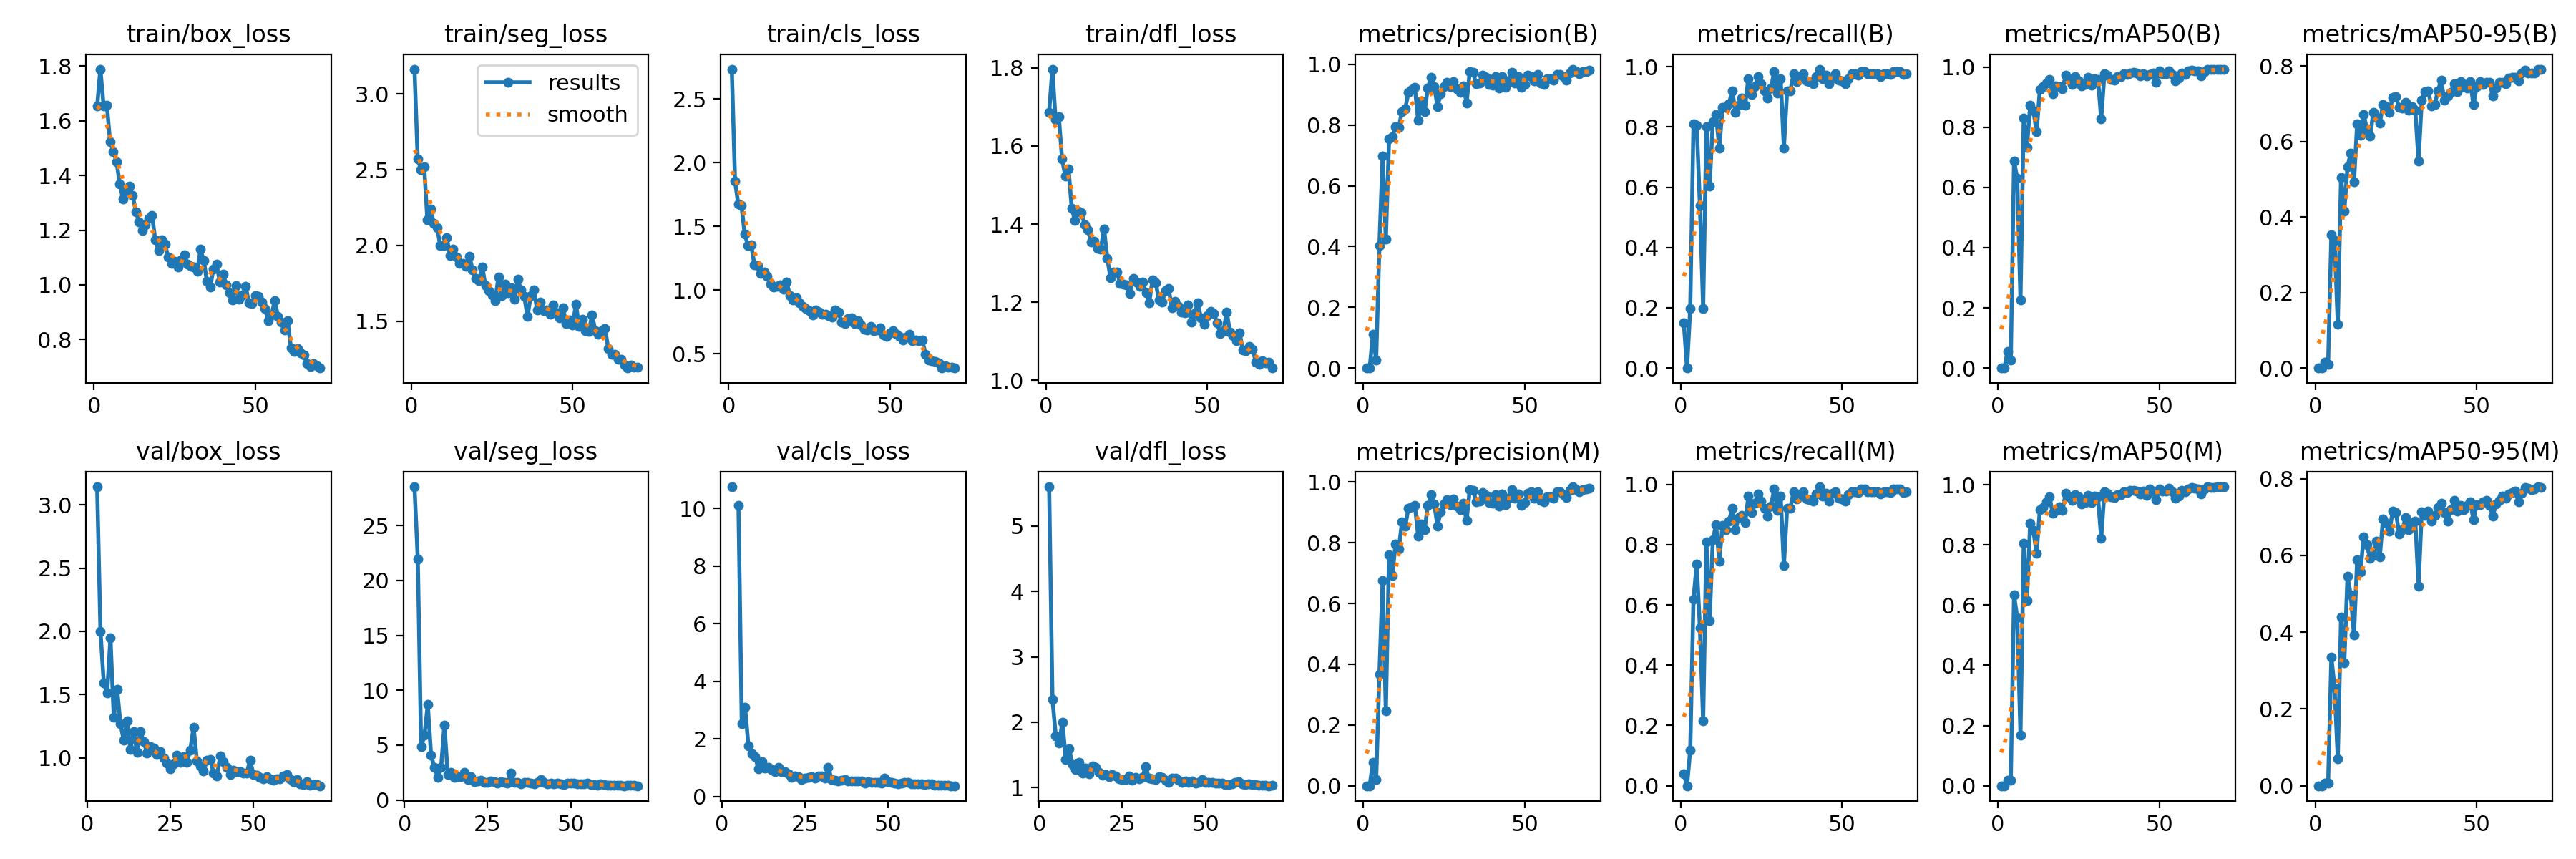

In [ ]:
#Displaying graphical reults from trained model
from IPython.display import Image
Image('/content/dataset/runs/segment/train/results.png')


image 1/1 /content/dataset/BRAIN-TUMOR-1/test/images/y154_jpg.rf.bcc8bca03d5c754b1c3fecab26584b79.jpg: 640x640 1 tumor, 12.9ms
Speed: 2.2ms preprocess, 12.9ms inference, 13.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/dataset/runs/segment/predict


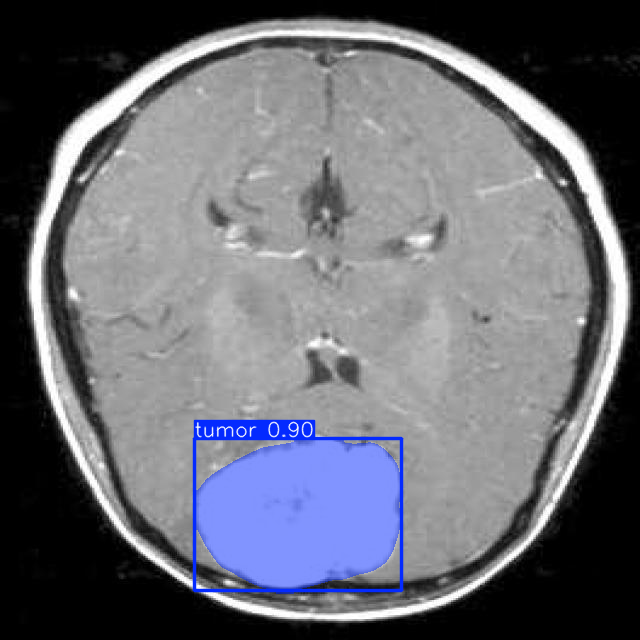

In [ ]:
#Taking prediction from trained model on an image from test data
model=YOLO('/content/dataset/runs/segment/train/weights/best.pt')
result=model('/content/dataset/BRAIN-TUMOR-1/test/images/y154_jpg.rf.bcc8bca03d5c754b1c3fecab26584b79.jpg', save=True)
result[0].show()

In [ ]:
#saving dataset file to drive
!cp -r /content/dataset /content/drive/MyDrive